In [4]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'movieanalysis.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(message)s - %(levelname)s',
                    force = True)

# Import OrderedDict Function
from collections import OrderedDict

In [10]:
df = pd.read_csv('C:/MoviePredictionModel/data/raw/mymoviedb.csv', lineterminator = '\n')

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [13]:
df.info() # For Checking the DATA TYPE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [14]:
df.duplicated().sum() # Checking the duplicate values 

np.int64(0)

In [15]:
df.describe() # Performing basic statistics

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [16]:
'''
***** SUMMARY *****
1) The dataframe consists of 9827 rows and 9 coloumns
2) The data looks clean and tidy with no NaN and duplicate values
3) Release_Date column need to be converted from object datatype to Datetime Format
4) There are noteable white space in the Genre column which needs to be cleared
5) Columns like Overview, Original_Language and Poster_URL can be dropped becuase they are not for use 
'''

'\n***** SUMMARY *****\n1) The dataframe consists of 9827 rows and 9 coloumns\n2) The data looks clean and tidy with no NaN and duplicate values\n3) Release_Date column need to be converted from object datatype to Datetime Format\n4) There are noteable white space in the Genre column which needs to be cleared\n5) Columns like Overview, Original_Language and Poster_URL can be dropped becuase they are not for use \n'

In [17]:
# Changing the format of the release_date
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [18]:
# Fetching only the Year of the movie
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

Dropping the columns which are not for use

In [19]:
cols = ['Overview' , 'Original_Language' , 'Poster_Url']

In [20]:
df.drop(cols, axis = 1, inplace = True)

In [ ]:
# Dropped all the columns 
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

Categorize Vote_Average column
We will cut the Vote_Average column and make 4 categories: popular, average, below_average, not_popular to describe it more cetgorize_col() function provided
if the vote comes under 'max' --> Popular
if it comes between 75%-50% --> average_popular
if it comes between 50%-25% --> below_average
if it lies under 25% --> not_popular

In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [23]:
# Taggin each and every movies according to theri category
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [25]:
# Checking the Vote_Average column as their category
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [26]:
# Checking the counts of each and every category
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [ ]:
# If exists any null values then drop
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we will split genre in to the list and explode the dataframe to have only one genre per row for each movie

In [ ]:
# Genre wise movies distribution 
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [29]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [30]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Questions
1) What is the most frequent Genre of the movies released on Netflix?
2) What genre has highest votes?
3) Which movie got the highest popularity? What's its genre?
4) Which movie got the lowest popularity? What's its genre?
5) Which year has the most filmed movies?

Data Visualization

In [31]:
sns.set_style('whitegrid')

Q.1) What is the most frequent Genre of the movies released on Netflix?

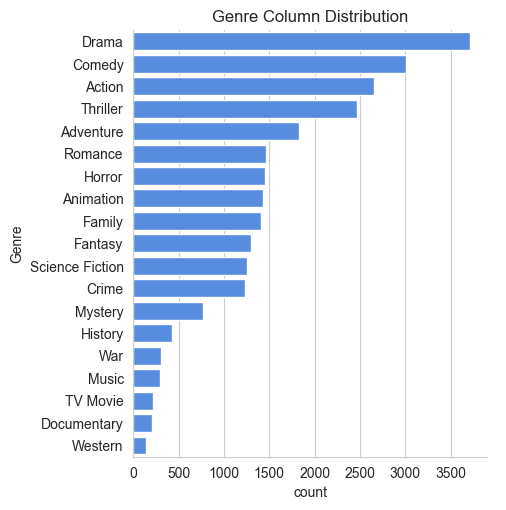

In [32]:
df['Genre'].describe()
sns.catplot(y = 'Genre', data = df, kind = 'count',
           order = df['Genre'].value_counts().index,
           color = '#4287f5')
plt.title('Genre Column Distribution')
plt.show()

Q.2) Which has the highest vote in the vote avg column?

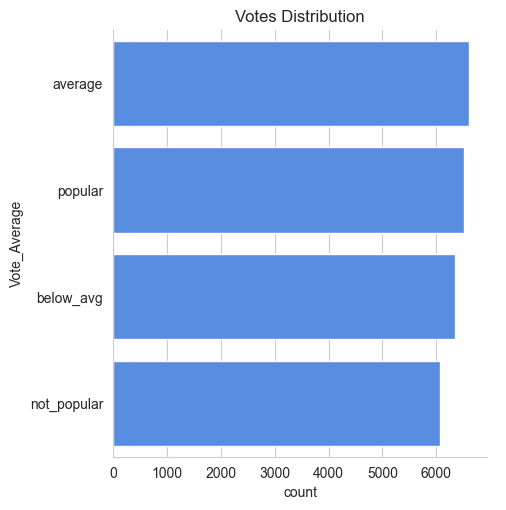

In [33]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Votes Distribution')
plt.show()

Q.3) Which movie got highest popularity? What's its Genre?

In [34]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Q.4) Which movie got lowest popularity? What's its Genre?

In [35]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


Q.5) Which Year has the most Filmmed movie?

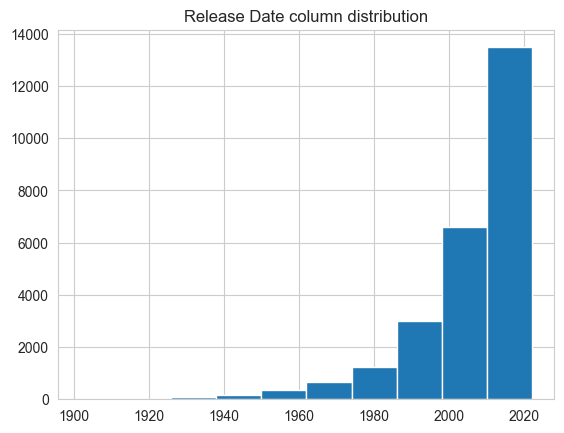

In [36]:
df['Release_Date'].hist()
plt.title('Release Date column distribution')
plt.show()

### Conclusion
### Q.1) What is the most frequent Genre of the movies released on Netflix?
### Ans:- Drama Genre is the most frequent genre in the dataset and has appeared around 14% in the total 19 Genre

### Q.2) What genre has highest votes?
### Ans:- We have 25.5% of the dataset with popular vote (6520 rows). Drama again gets the highest popularity amongst fans having more than of 18.5% of movie popularity

### Q.3) Which movie got the highest popularity? What's its genre?
### Ans:- Spider-man No Way Home has the highest popularity rate in our dataset with the genre of Action, Adventure and Science Fiction

### Q.4) Which movie got the Lowest popularity? What's its genre?
### Ans:- The United States and Threats have the lowest popurality rate in our dataset with the Genre of Music, Drama, History, War and Science Fiction.

### Q.5) Which year has the most filmed movies?
### Ans:- Year 2020 has the highest filmmed movie in the dataset